In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import os
import matplotlib.animation as animation

In [3]:
ruta_datos="datos"
nombre_archivo="Cavityflow.txt"
archivo = os.path.join(ruta_datos, nombre_archivo)





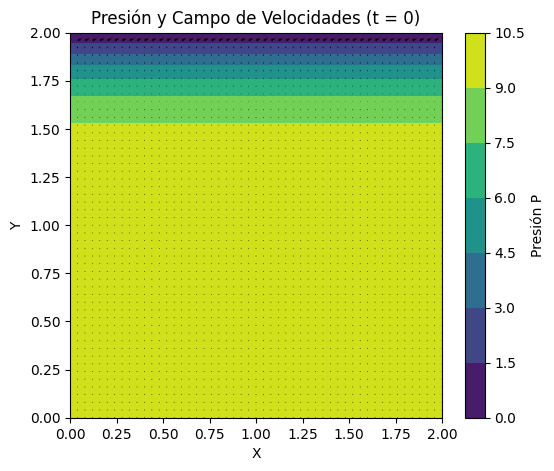

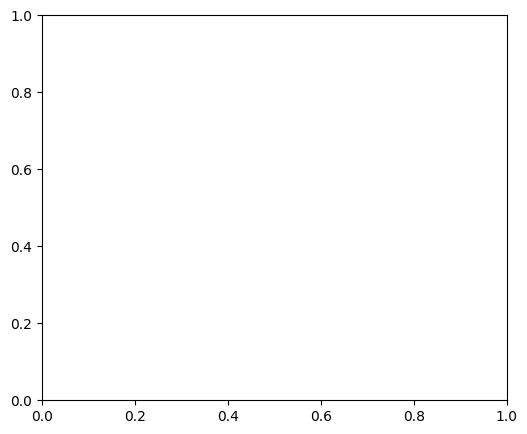

In [6]:

# 1. Leer archivo ignorando las líneas con '#'
df = pd.read_csv(
    archivo,
    comment='#',
    sep=r"\s+",
    names=["i","j","x","y","u","v","p","Fx","Fy"],
    engine="python"
)

# 2. Identificar dimensiones de la malla (para reacomodar datos)
Nx = df["i"].max() + 1
Ny = df["j"].max() + 1

# 3. Agregar columna de tiempo
# Cada bloque es Nx*Ny filas. Calculamos el índice del bloque como "tiempo"
df["t_index"] = df.index // (Nx*Ny)

# 4. Función para graficar un tiempo dado
def plot_timestep(df, t_index):
    data = df[df["t_index"] == t_index]
    X = data["x"].values.reshape((Ny, Nx))
    Y = data["y"].values.reshape((Ny, Nx))
    U = data["u"].values.reshape((Ny, Nx))
    V = data["v"].values.reshape((Ny, Nx))
    P = data["p"].values.reshape((Ny, Nx))

    fig, ax = plt.subplots(figsize=(6,5))
    cont = ax.contourf(X, Y, P, cmap="viridis")
    plt.colorbar(cont, ax=ax, label="Presión P")
    ax.quiver(X, Y, U, V, color="black", scale=5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Presión y Campo de Velocidades (t = {t_index})")
    plt.show()

# Ejemplo: graficar el tiempo 0
plot_timestep(df, 0)

# 5. (Opcional) Animación para todos los tiempos
def animate_flow(df):
    timesteps = df["t_index"].unique()
    fig, ax = plt.subplots(figsize=(6,5))

    def update(frame):
        ax.clear()
        data = df[df["t_index"] == frame]
        X = data["x"].values.reshape((Ny, Nx))
        Y = data["y"].values.reshape((Ny, Nx))
        U = data["u"].values.reshape((Ny, Nx))
        V = data["v"].values.reshape((Ny, Nx))
        P = data["p"].values.reshape((Ny, Nx))
        cont = ax.contourf(X, Y, P, cmap="viridis")
        ax.quiver(X, Y, U, V, color="black", scale=5)
        ax.set_title(f"Presión y Campo de Velocidades (t = {frame})")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        return []

    ani = animation.FuncAnimation(fig, update, frames=timesteps, interval=300, repeat=True)
    plt.show()
    return ani

# Para animación
animate_flow(df)


   i  j    x     y    u    v     p  Fx  Fy
0  0  0  0.0  0.00  0.0  0.0  10.0   0   0
1  0  1  0.0  0.04  0.0  0.0  10.0   0   0
2  0  2  0.0  0.08  0.0  0.0  10.0   0   0
3  0  3  0.0  0.12  0.0  0.0  10.0   0   0
4  0  4  0.0  0.16  0.0  0.0  10.0   0   0
Nx=51, Ny=51
Tiempos disponibles: [0 1 2 3 4 5 6 7 8 9]


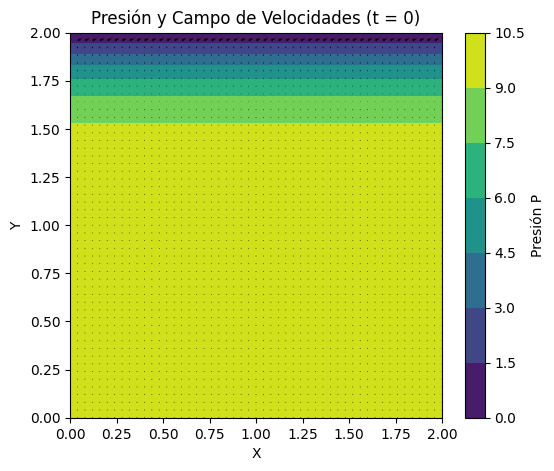

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ruta_datos = "datos"
nombre_archivo = "Cavityflow.txt"
archivo = os.path.join(ruta_datos, nombre_archivo)

# Leer datos ignorando comentarios
df = pd.read_csv(
    archivo,
    comment='#',
    sep=r"\s+",
    names=["i","j","x","y","u","v","p","Fx","Fy"],
    engine="python"
)

# Verificar primeras filas
print(df.head())

# Determinar malla
Nx = df["i"].max() + 1
Ny = df["j"].max() + 1
print(f"Nx={Nx}, Ny={Ny}")

# Asignar índice de tiempo
df["t_index"] = df.index // (Nx * Ny)
print("Tiempos disponibles:", df["t_index"].unique())

# Función para graficar un paso de tiempo
def plot_timestep(df, t_index):
    data = df[df["t_index"] == t_index]
    if data.empty:
        print(f"No hay datos para t_index={t_index}")
        return
    X = data["x"].to_numpy().reshape((Ny, Nx))
    Y = data["y"].to_numpy().reshape((Ny, Nx))
    U = data["u"].to_numpy().reshape((Ny, Nx))
    V = data["v"].to_numpy().reshape((Ny, Nx))
    P = data["p"].to_numpy().reshape((Ny, Nx))

    fig, ax = plt.subplots(figsize=(6,5))
    cont = ax.contourf(X, Y, P, cmap="viridis")
    plt.colorbar(cont, ax=ax, label="Presión P")
    ax.quiver(X, Y, U, V, color="black", scale=5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Presión y Campo de Velocidades (t = {t_index})")
    plt.show()

# Prueba con el primer tiempo
plot_timestep(df, 0)


Animación guardada en CavityFlow.gif


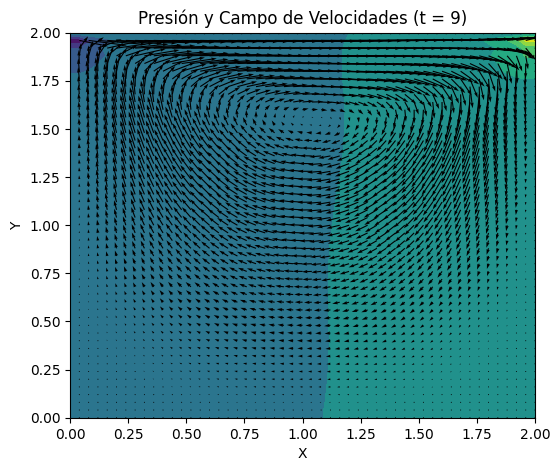

In [8]:
import matplotlib.animation as animation

def animate_flow(df, Nx, Ny, savefile=None):
    timesteps = df["t_index"].unique()
    fig, ax = plt.subplots(figsize=(6,5))

    def update(frame):
        ax.clear()
        data = df[df["t_index"] == frame]
        X = data["x"].to_numpy().reshape((Ny, Nx))
        Y = data["y"].to_numpy().reshape((Ny, Nx))
        U = data["u"].to_numpy().reshape((Ny, Nx))
        V = data["v"].to_numpy().reshape((Ny, Nx))
        P = data["p"].to_numpy().reshape((Ny, Nx))
        cont = ax.contourf(X, Y, P, cmap="viridis")
        ax.quiver(X, Y, U, V, color="black", scale=5)
        ax.set_title(f"Presión y Campo de Velocidades (t = {frame})")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        return []

    ani = animation.FuncAnimation(fig, update, frames=timesteps, interval=500, repeat=True)

    if savefile:
        # Guardar como GIF (requiere ImageMagick o Pillow)
        ani.save(savefile, writer='pillow', fps=2)
        print(f"Animación guardada en {savefile}")

    plt.show()
    return ani

# Generar animación y guardarla
animate_flow(df, Nx=51, Ny=51, savefile="CavityFlow.gif")


   i  j    x     y      u             v   p  Fx  Fy
0  0  0  0.0  0.00  0.000  0.000000e+00  10   1   0
1  0  1  0.0  0.04  0.001  7.155350e-11  10   1   0
2  0  2  0.0  0.08  0.001  5.835550e-11  10   1   0
3  0  3  0.0  0.12  0.001  6.374580e-11  10   1   0
4  0  4  0.0  0.16  0.001  6.887700e-11  10   1   0
Nx=51, Ny=51
Tiempos disponibles: [0 1 2 3 4 5 6 7 8 9]


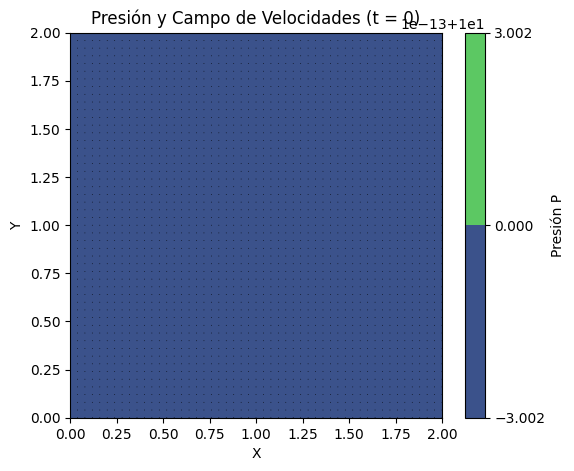

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ruta_datos = "datos"
nombre_archivo = "Chanelflow.txt"
archivo = os.path.join(ruta_datos, nombre_archivo)

# Leer datos ignorando comentarios
df = pd.read_csv(
    archivo,
    comment='#',
    sep=r"\s+",
    names=["i","j","x","y","u","v","p","Fx","Fy"],
    engine="python"
)

# Verificar primeras filas
print(df.head())

# Determinar malla
Nx = df["i"].max() + 1
Ny = df["j"].max() + 1
print(f"Nx={Nx}, Ny={Ny}")

# Asignar índice de tiempo
df["t_index"] = df.index // (Nx * Ny)
print("Tiempos disponibles:", df["t_index"].unique())

# Función para graficar un paso de tiempo
def plot_timestep(df, t_index):
    data = df[df["t_index"] == t_index]
    if data.empty:
        print(f"No hay datos para t_index={t_index}")
        return
    X = data["x"].to_numpy().reshape((Ny, Nx))
    Y = data["y"].to_numpy().reshape((Ny, Nx))
    U = data["u"].to_numpy().reshape((Ny, Nx))
    V = data["v"].to_numpy().reshape((Ny, Nx))
    P = data["p"].to_numpy().reshape((Ny, Nx))

    fig, ax = plt.subplots(figsize=(6,5))
    cont = ax.contourf(X, Y, P, cmap="viridis")
    plt.colorbar(cont, ax=ax, label="Presión P")
    ax.quiver(X, Y, U, V, color="black", scale=5)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Presión y Campo de Velocidades (t = {t_index})")
    plt.show()

# Prueba con el primer tiempo
plot_timestep(df, 0)


Animación guardada en ChanelFlow.gif


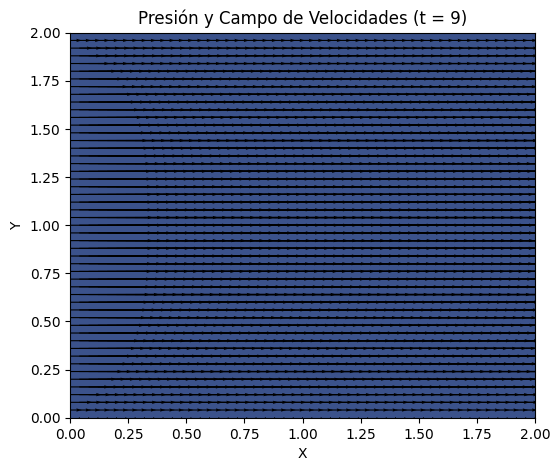

In [10]:
import matplotlib.animation as animation

def animate_flow(df, Nx, Ny, savefile=None):
    timesteps = df["t_index"].unique()
    fig, ax = plt.subplots(figsize=(6,5))

    def update(frame):
        ax.clear()
        data = df[df["t_index"] == frame]
        X = data["x"].to_numpy().reshape((Ny, Nx))
        Y = data["y"].to_numpy().reshape((Ny, Nx))
        U = data["u"].to_numpy().reshape((Ny, Nx))
        V = data["v"].to_numpy().reshape((Ny, Nx))
        P = data["p"].to_numpy().reshape((Ny, Nx))
        cont = ax.contourf(X, Y, P, cmap="viridis")
        ax.quiver(X, Y, U, V, color="black", scale=5)
        ax.set_title(f"Presión y Campo de Velocidades (t = {frame})")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        return []

    ani = animation.FuncAnimation(fig, update, frames=timesteps, interval=500, repeat=True)

    if savefile:
        # Guardar como GIF (requiere ImageMagick o Pillow)
        ani.save(savefile, writer='pillow', fps=2)
        print(f"Animación guardada en {savefile}")

    plt.show()
    return ani

# Generar animación y guardarla
animate_flow(df, Nx=51, Ny=51, savefile="ChanelFlow.gif")